# Per-Decision Final Experiments with Gamma=1.0
This time, we want to compare the final PDIS method with its vanilla-POIS counterpart, to be inserted in the paper. We need to optimize the delta parameter and compare on 20 runs for each of the standard environments presented in the original POIS paper.

In [1]:
import sys
sys.path = ['..'] + sys.path
import pandas as pd
import numpy as np
import glob, sys, json, re
import matplotlib.pyplot as plt
import scipy.stats as sts
from sacred_notebook_utils import plot_mean_ci, plot_all
from baselines.common.sacred_utils import load_runs, filter_runs

In [2]:
runs = load_runs('../../../sacred_data/sacred_runs_master/')
print("Loaded runs:", len(runs.keys()))
final_runs = load_runs('../../../sacred_data/sacred_runs_final/')
print("Loaded final runs:", len(final_runs.keys()))

Loaded runs: 572
Loaded final runs: 704


In [3]:
pdisnn_runs_local = load_runs('../sacred_pdisnn/')
print("Loaded pdisnn runs:", len(pdisnn_runs_local.keys()))

Loaded pdisnn runs: 588


In [4]:
# Merge the runs
total_runs = {}
for key, value in runs.items():
    total_runs[str(key) + '-base'] = value
for key, value in final_runs.items():
    total_runs[str(key) + '-final'] = value
for key, value in pdisnn_runs_local.items():
    total_runs[str(key) + '-local'] = value

In [5]:
base_query = {
    'run.status': 'COMPLETED',
    'config.center': False,
    'config.gamma': 1.0,
    'config.clipping': False,
    'config.natural': False,
    'config.policy': 'nn',
    'config.iw_norm': 'none',
}

## Cartpole - Linear Policy
We start by selecting the best delta parameter.

### Delta tuning

----------------------------------------
Method: pdis  - Delta: 0.1
Experiments: 5
Seeds: 10, 160, 570, 109, 904
----------------------------------------
Method: pdis  - Delta: 0.2
Experiments: 5
Seeds: 570, 904, 160, 10, 109
----------------------------------------
Method: pdis  - Delta: 0.3
Experiments: 5
Seeds: 904, 570, 109, 10, 160
----------------------------------------
Method: pdis  - Delta: 0.4
Experiments: 5
Seeds: 10, 109, 160, 904, 570
----------------------------------------
Method: pdis  - Delta: 0.5
Experiments: 5
Seeds: 570, 109, 160, 904, 10
----------------------------------------
Method: pdis  - Delta: 0.6
Experiments: 5
Seeds: 570, 160, 109, 10, 904
----------------------------------------
Method: pdis  - Delta: 0.7
Experiments: 5
Seeds: 570, 109, 904, 160, 10
----------------------------------------
Method: pdis  - Delta: 0.8
Experiments: 5
Seeds: 904, 10, 109, 160, 570
----------------------------------------
Method: pdis  - Delta: 0.9
Experiments: 5
Seeds: 160, 1

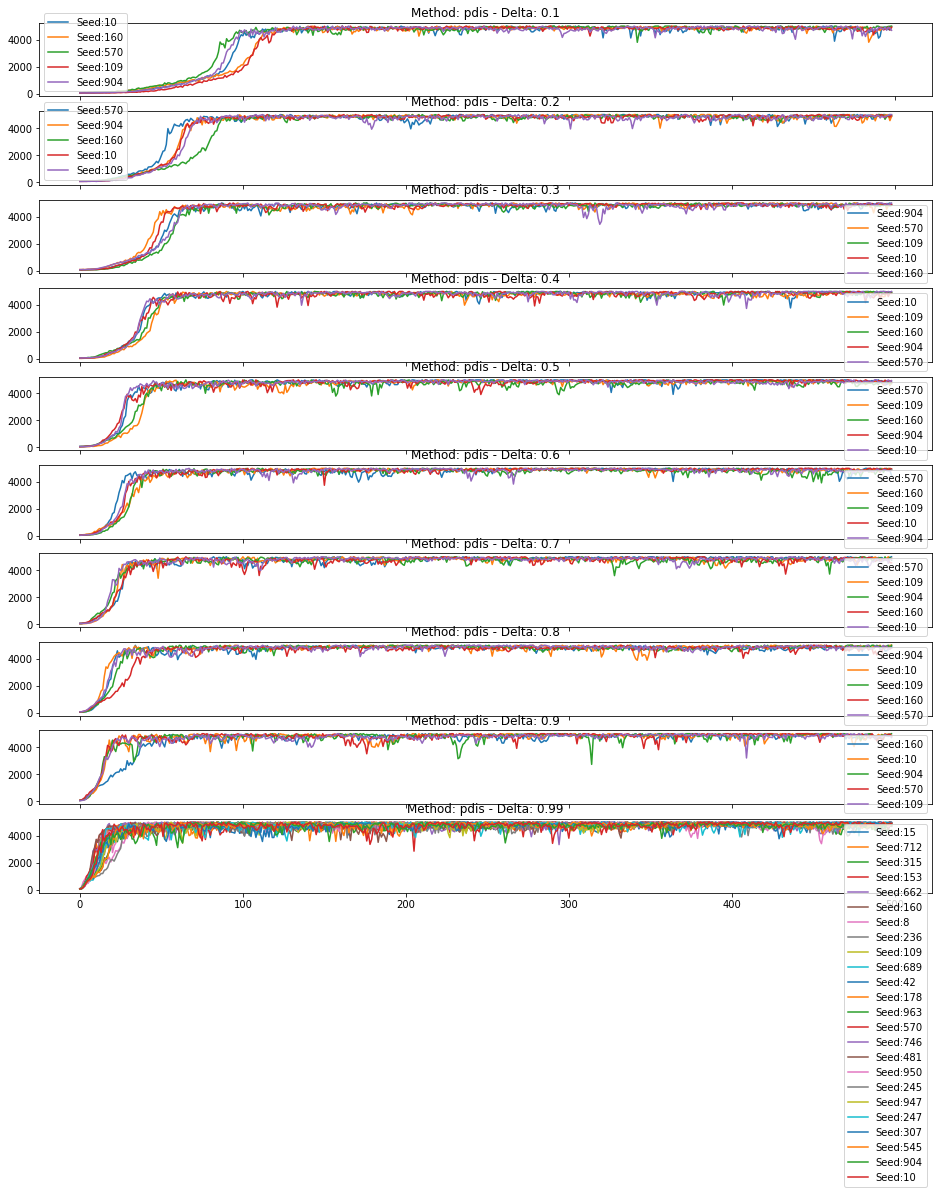

In [6]:
fig, axis = plt.subplots(nrows=10, ncols=1, figsize=(16,16), sharex=True, sharey=True)
for i, (method, bound, delta) in enumerate([('pdis', 'pdis-max-d2', 0.1), 
                                              ('pdis', 'pdis-max-d2', 0.2),
                                              ('pdis', 'pdis-max-d2', 0.3),
                                              ('pdis', 'pdis-max-d2', 0.4),
                                              ('pdis', 'pdis-max-d2', 0.5),
                                              ('pdis', 'pdis-max-d2', 0.6),
                                              ('pdis', 'pdis-max-d2', 0.7),
                                              ('pdis', 'pdis-max-d2', 0.8),
                                              ('pdis', 'pdis-max-d2', 0.9),
                                              ('pdis', 'pdis-max-d2', 0.99),
                                            ]):
    query = {
        'config.env': 'rllab.cartpole',
        'config.iw_method': method,
        'config.delta': delta,
        'config.bound': bound,
        'config.num_episodes': 100,
        'config.policy_init': 'xavier'
    }
    filtered_runs = filter_runs({**base_query, **query}, total_runs)
    print('----------------------------------------')
    print("Method:", method, " - Delta:", str(delta))
    print("Experiments:", len(filtered_runs.keys()))
    print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))
    plot_all(filtered_runs, 'EpRewMean', axis[i])
    axis[i].set_title("Method: " + method + " - Delta: " + str(delta))
plt.show();

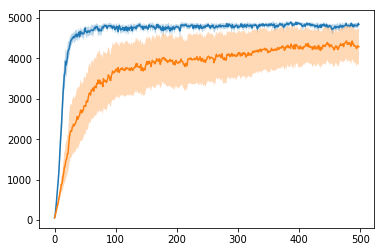

Seeds: 15, 712, 315, 153, 662, 160, 8, 236, 109, 689, 42, 178, 963, 570, 746, 481, 950, 245, 947, 247, 307, 545, 904, 10


In [7]:
query = {
        'config.env': 'rllab.cartpole',
        'config.iw_method': 'pdis',
        'config.delta': 0.99,
        'config.bound': 'pdis-max-d2',
        'config.num_episodes': 100,
        'config.policy_init': 'xavier'
    }
query_ref = {
        'config.env': 'rllab.cartpole',
        'config.iw_method': 'is',
        'config.delta': 0.99,
        'config.bound': 'max-d2',
        'config.num_episodes': 100,
        'config.policy_init': 'xavier'
    }
filtered_runs = filter_runs({**base_query, **query}, total_runs)
filtered_runs_ref = filter_runs({**base_query, **query_ref}, total_runs)
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
plot_mean_ci(filtered_runs, 'EpRewMean', axis)
plot_mean_ci(filtered_runs_ref, 'EpRewMean', axis)
plt.show();
print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))

We can also evaluate the IS baseline, with the parameter as tuned in the paper.

## Inverted Double Pendulum

----------------------------------------
Method: pdis  - Delta: 0.8
Experiments: 5
Seeds: 109, 160, 10, 904, 570
----------------------------------------
Method: pdis  - Delta: 0.9
Experiments: 5
Seeds: 10, 160, 570, 109, 904
----------------------------------------
Method: pdis  - Delta: 0.99
Experiments: 25
Seeds: 315, 746, 245, 689, 963, 178, 42, 153, 236, 570, 109, 947, 904, 950, 10, 662, 247, 481, 8, 545, 712, 15, 160, 100, 307
----------------------------------------
Method: pdis  - Delta: 0.9999
Experiments: 5
Seeds: 570, 10, 160, 109, 904


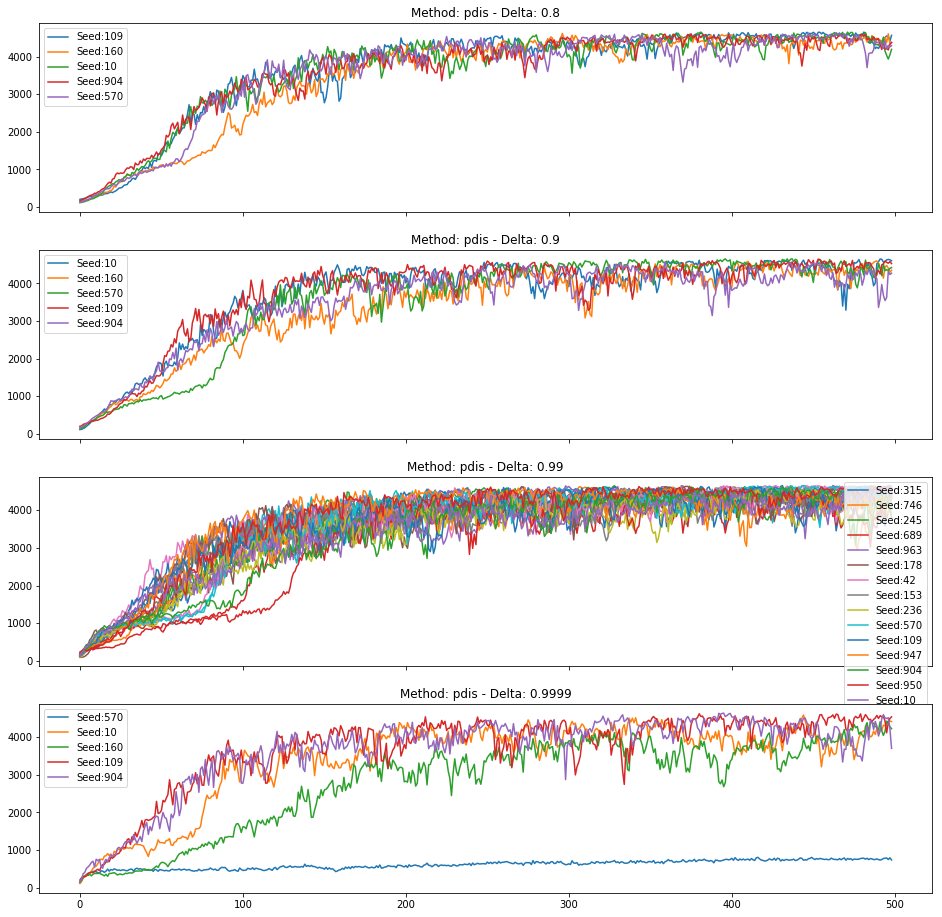

In [7]:
fig, axis = plt.subplots(nrows=4, ncols=1, figsize=(16,16), sharex=True, sharey=True)
for i, (method, bound, delta) in enumerate([('pdis', 'pdis-max-d2', 0.8), 
                                              ('pdis', 'pdis-max-d2', 0.9),
                                              ('pdis', 'pdis-max-d2', 0.99),
                                              ('pdis', 'pdis-max-d2', 0.9999)
                                            ]):
    query = {
        'config.env': 'rllab.inverted-double-pendulum',
        'config.iw_method': method,
        'config.delta': delta,
        'config.bound': bound,
        'config.num_episodes': 100
    }
    filtered_runs = filter_runs({**base_query, **query}, total_runs)
    print('----------------------------------------')
    print("Method:", method, " - Delta:", str(delta))
    print("Experiments:", len(filtered_runs.keys()))
    print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))
    plot_all(filtered_runs, 'EpRewMean', axis[i])
    axis[i].set_title("Method: " + method + " - Delta: " + str(delta))
plt.show();

ValueError: min() arg is an empty sequence

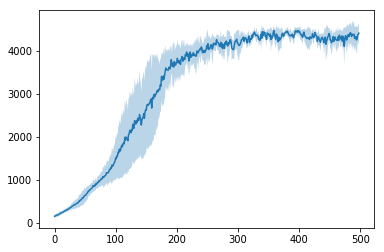

In [8]:
query = {
        'config.env': 'rllab.inverted-double-pendulum',
        'config.iw_method': 'pdis',
        'config.delta': 0.4,
        'config.bound': 'pdis-max-d2',
        'config.num_episodes': 100,
        'config.policy_init': 'xavier'
    }
query_ref = {
        'config.env': 'rllab.inverted-double-pendulum',
        'config.iw_method': 'is',
        #'config.delta': 0.1,
        'config.bound': 'max-d2',
        #'config.num_episodes': 100,
        #'config.policy_init': 'xavier'
}
filtered_runs = filter_runs({**base_query, **query}, total_runs)
filtered_runs_ref = filter_runs({**base_query, **query_ref}, total_runs)
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
plot_mean_ci(filtered_runs, 'EpRewMean', axis)
plot_mean_ci(filtered_runs_ref, 'EpRewMean', axis)
plt.show();
print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))

No handles with labels found to put in legend.


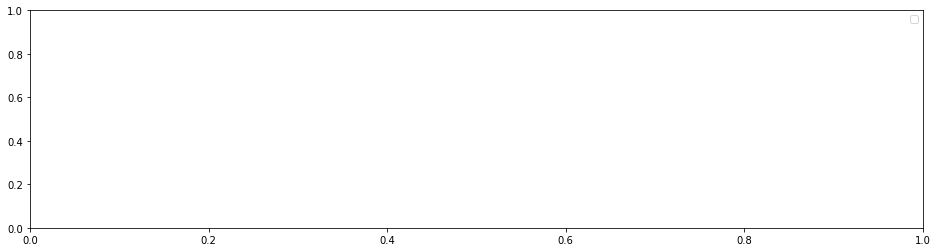

Seeds: 


In [19]:
query = {
        'config.env': 'rllab.inverted-double-pendulum',
        'config.iw_method': 'is',
        'config.delta': 0.1,
        'config.bound': 'max-d2',
        'config.num_episodes': 100,
        'config.policy_init': 'zeros'
    }
filtered_runs = filter_runs({**base_query, **query}, total_runs)
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(16,4))
plot_all(filtered_runs, 'EpRewMean', axis)
plt.show();
print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))

## Acrobot

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


----------------------------------------
Method: pdis  - Delta: 0.1
Experiments: 0
Seeds: 
----------------------------------------
Method: pdis  - Delta: 0.3
Experiments: 0
Seeds: 
----------------------------------------
Method: pdis  - Delta: 0.5
Experiments: 0
Seeds: 
----------------------------------------
Method: pdis  - Delta: 0.7
Experiments: 0
Seeds: 
----------------------------------------
Method: pdis  - Delta: 0.9
Experiments: 0
Seeds: 


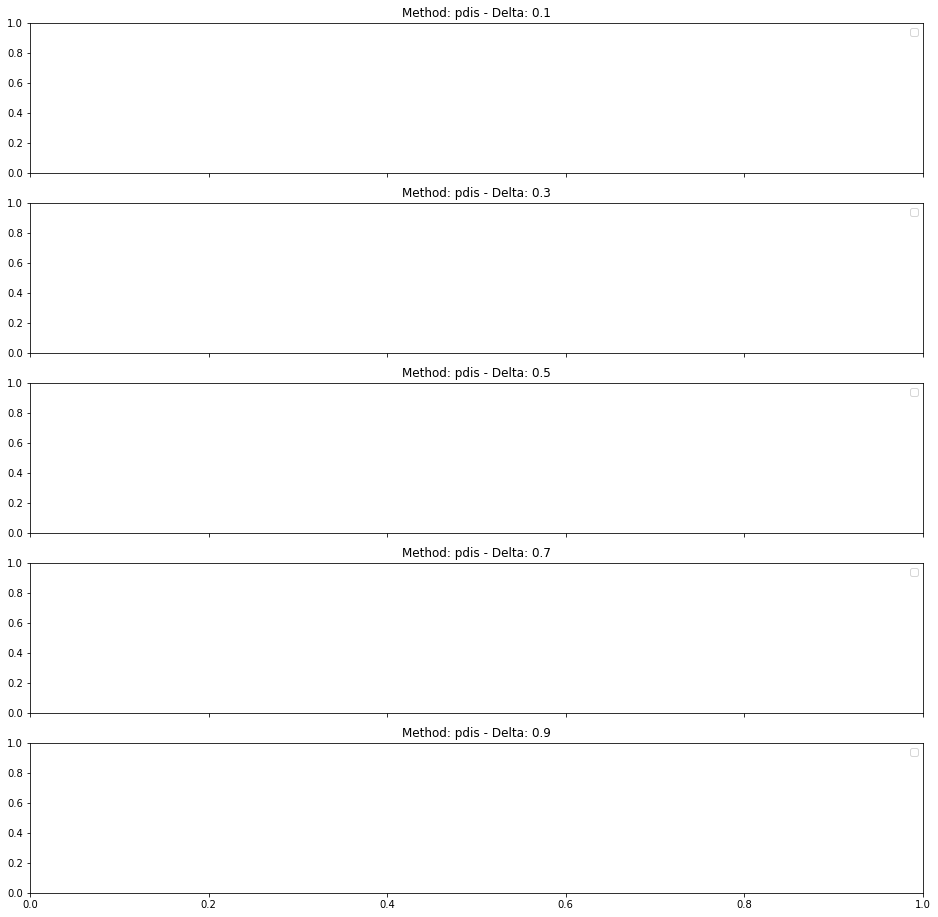

In [38]:
fig, axis = plt.subplots(nrows=5, ncols=1, figsize=(16,16), sharex=True, sharey=True)
for i, (method, bound, delta) in enumerate([('pdis', 'pdis-max-d2', 0.1), 
                                              ('pdis', 'pdis-max-d2', 0.3),
                                              ('pdis', 'pdis-max-d2', 0.5),
                                              ('pdis', 'pdis-max-d2', 0.7),
                                              ('pdis', 'pdis-max-d2', 0.9)
                                            ]):
    query = {
        'config.env': 'rllab.acrobot',
        'config.policy': 'nn'
        #'config.iw_method': method,
        #'config.delta': delta,
        #'config.bound': bound,
        #'config.num_episodes': 100,
        #'config.policy_init': 'zeros'
    }
    filtered_runs = filter_runs({**query}, total_runs)
    print('----------------------------------------')
    print("Method:", method, " - Delta:", str(delta))
    print("Experiments:", len(filtered_runs.keys()))
    print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))
    plot_all(filtered_runs, 'EpRewMean', axis[i])
    axis[i].set_title("Method: " + method + " - Delta: " + str(delta))
plt.show();

ValueError: min() arg is an empty sequence

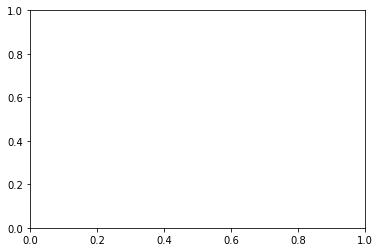

In [23]:
query = {
        'config.env': 'rllab.acrobot',
        'config.iw_method': 'pdis',
        'config.delta': 0.7,
        'config.bound': 'pdis-max-d2',
        'config.num_episodes': 100,
        'config.policy_init': 'zeros'
    }
filtered_runs = filter_runs({**base_query, **query}, total_runs)
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
plot_mean_ci(filtered_runs, 'EpRewMean', axis)
plt.show();
print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))

ValueError: min() arg is an empty sequence

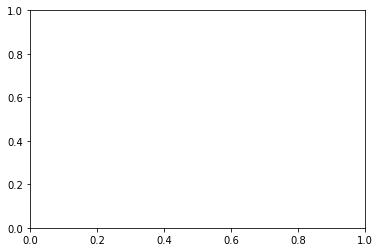

In [24]:
query = {
        'config.env': 'rllab.acrobot',
        'config.iw_method': 'is',
        'config.delta': 0.7,
        'config.bound': 'max-d2',
        'config.num_episodes': 100,
        'config.policy_init': 'zeros'
    }
filtered_runs = filter_runs({**base_query, **query}, total_runs)
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
plot_mean_ci(filtered_runs, 'EpRewMean', axis)
plt.show();
print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))

## Mountain car

----------------------------------------
Method: pdis  - Delta: 0.1
Experiments: 5
Seeds: 109, 160, 904, 570, 10
----------------------------------------
Method: pdis  - Delta: 0.3
Experiments: 5
Seeds: 109, 904, 160, 570, 10
----------------------------------------
Method: pdis  - Delta: 0.5
Experiments: 5
Seeds: 10, 160, 570, 904, 109
----------------------------------------
Method: pdis  - Delta: 0.7
Experiments: 5
Seeds: 109, 10, 570, 904, 160
----------------------------------------
Method: pdis  - Delta: 0.9
Experiments: 5
Seeds: 160, 109, 904, 570, 10
----------------------------------------
Method: pdis  - Delta: 0.99
Experiments: 5
Seeds: 160, 109, 570, 10, 904


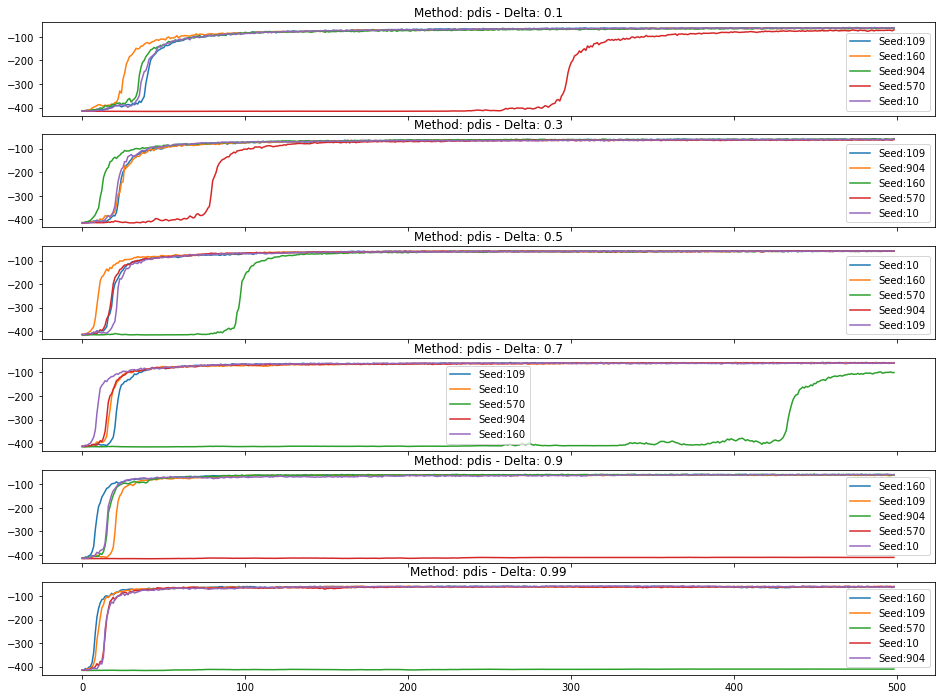

In [11]:
fig, axis = plt.subplots(nrows=6, ncols=1, figsize=(16,12), sharex=True, sharey=True)
for i, (method, bound, delta) in enumerate([('pdis', 'pdis-max-d2', 0.1), 
                                              ('pdis', 'pdis-max-d2', 0.3),
                                              ('pdis', 'pdis-max-d2', 0.5),
                                              ('pdis', 'pdis-max-d2', 0.7),
                                              ('pdis', 'pdis-max-d2', 0.9),
                                              ('pdis', 'pdis-max-d2', 0.99)
                                            ]):
    query = {
        'config.env': 'rllab.mountain-car',
        'config.iw_method': method,
        'config.delta': delta,
        'config.bound': bound,
        'config.num_episodes': 100,
        'config.policy_init': 'xavier'
    }
    filtered_runs = filter_runs({**base_query, **query}, total_runs)
    print('----------------------------------------')
    print("Method:", method, " - Delta:", str(delta))
    print("Experiments:", len(filtered_runs.keys()))
    print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))
    plot_all(filtered_runs, 'EpRewMean', axis[i])
    axis[i].set_title("Method: " + method + " - Delta: " + str(delta))
plt.show();

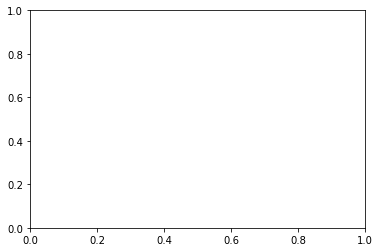

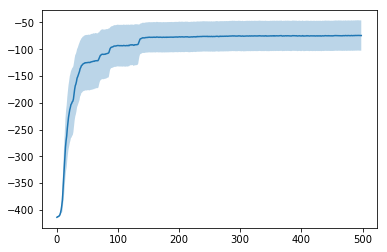

Seeds: 689, 481, 160, 153, 307, 109, 545, 950, 315, 236, 8, 570, 100, 746, 15, 10, 245, 963, 904, 247, 662, 178, 947, 712, 42


In [16]:
query = {
        'config.env': 'rllab.mountain-car',
        'config.iw_method': 'pdis',
        'config.delta': 0.99,
        'config.bound': 'pdis-max-d2',
        'config.num_episodes': 100,
    }
filtered_runs = filter_runs({**base_query, **query}, total_runs)
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
plot_mean_ci(filtered_runs, 'EpRewMean', axis)
plt.show();
print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))

ValueError: min() arg is an empty sequence

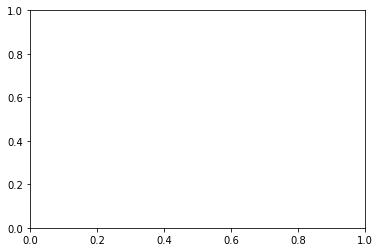

In [27]:
query = {
        'config.env': 'rllab.mountain-car',
        'config.iw_method': 'is',
        'config.delta': 0.9,
        'config.bound': 'max-d2',
        'config.num_episodes': 100,
        'config.policy_init': 'zeros'
    }
filtered_runs = filter_runs({**base_query, **query}, total_runs)
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
plot_mean_ci(filtered_runs, 'EpRewMean', axis)
plt.show();
print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))

## Swimmer

----------------------------------------
Method: pdis  - Delta: 0.1
Experiments: 5
Seeds: 160, 570, 109, 904, 10
----------------------------------------
Method: pdis  - Delta: 0.3
Experiments: 5
Seeds: 10, 904, 570, 160, 109
----------------------------------------
Method: pdis  - Delta: 0.5
Experiments: 5
Seeds: 109, 570, 904, 160, 10
----------------------------------------
Method: pdis  - Delta: 0.7
Experiments: 5
Seeds: 109, 160, 570, 10, 904
----------------------------------------
Method: pdis  - Delta: 0.9
Experiments: 5
Seeds: 160, 904, 570, 10, 109


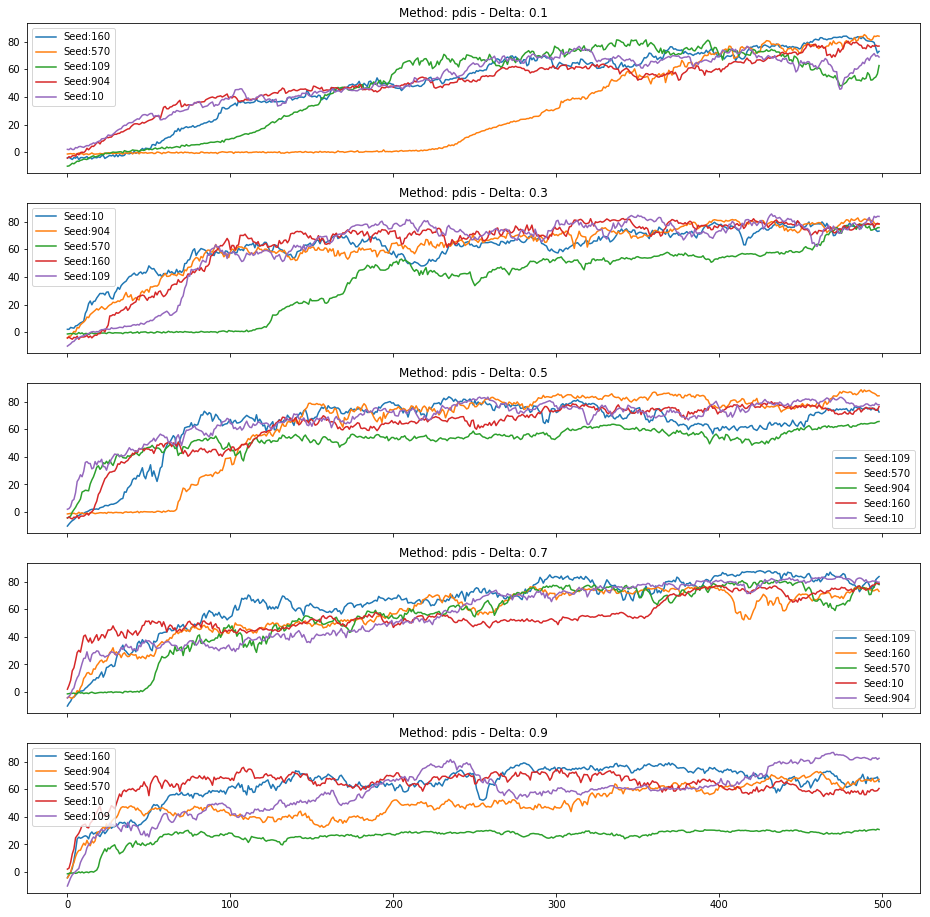

In [40]:
fig, axis = plt.subplots(nrows=5, ncols=1, figsize=(16,16), sharex=True, sharey=True)
for i, (method, bound, delta) in enumerate([('pdis', 'pdis-max-d2', 0.1), 
                                              ('pdis', 'pdis-max-d2', 0.3),
                                              ('pdis', 'pdis-max-d2', 0.5),
                                              ('pdis', 'pdis-max-d2', 0.7),
                                              ('pdis', 'pdis-max-d2', 0.9)
                                            ]):
    query = {
        'config.env': 'rllab.swimmer',
        'config.iw_method': method,
        'config.delta': delta,
        'config.bound': bound,
        'config.num_episodes': 100,
    }
    filtered_runs = filter_runs({**query}, total_runs)
    print('----------------------------------------')
    print("Method:", method, " - Delta:", str(delta))
    print("Experiments:", len(filtered_runs.keys()))
    print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))
    plot_all(filtered_runs, 'EpRewMean', axis[i])
    axis[i].set_title("Method: " + method + " - Delta: " + str(delta))
plt.show();